In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import os

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_()) if isinstance(a, pandas.DataFrame)
                         else self.template.format(a,  pandas.DataFrame(eval(a))._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [2]:
df = pandas.read_pickle('/home/johnny/Documents/performance_metrics_3-6/hog_result_df.pkl')

In [3]:
df.head()

,label,parsed_text,found_contour_area,ref_contour_area,source_image_location,image_has_plaque,plaque_found,text_matched,text_missed,text_misread,pose_info
0,[208],[],47.5,None,/home/johnny/Documents/real_world_images/POSIT...,True,True,[],[208],[],0.09439
1,[208],[],34,None,/home/johnny/Documents/real_world_images/POSIT...,True,True,[],[208],[],0.09439
2,[208],[],208,None,/home/johnny/Documents/real_world_images/POSIT...,True,True,[],[208],[],0.09439
3,[208],[],1075.5,None,/home/johnny/Documents/real_world_images/POSIT...,True,True,[],[208],[],0.09439
4,[208],[],67.5,None,/home/johnny/Documents/real_world_images/POSIT...,True,True,[],[208],[],0.09439


In [4]:
df['pose_info'] = df['source_image_location'].apply(lambda x: float(os.path.split(x)[1].split('-')[0].replace('DSC', '0.')))
df.head()
# lets drop some unused columns
df = df.drop(columns=['ref_contour_area','source_image_location','image_has_plaque'])
df.head()
# d2 = pandas.concat([df['pose_info'], df['label']], axis=1)
# d2.head()
# index = pandas.MultiIndex.from_frame(d2)
# index
# df = df.reindex(index)
# df
# df.set_index('pose_info')
# here i am using the name of the photograph as the 'pose' information. Since the images
# were taken sequentially, the proximity of these numbers is sometimes meaninful.
# at the very least I can see how well the pipeline does on a marked image

,label,parsed_text,found_contour_area,plaque_found,text_matched,text_missed,text_misread,pose_info
0,[208],[],47.5,True,[],[208],[],0.09439
1,[208],[],34,True,[],[208],[],0.09439
2,[208],[],208,True,[],[208],[],0.09439
3,[208],[],1075.5,True,[],[208],[],0.09439
4,[208],[],67.5,True,[],[208],[],0.09439


In [5]:
# summing gives me a list of the found words per pose (image) for those which have multiple discoveried int he images
display("df.groupby('pose_info')['parsed_text'].sum()", "df.groupby('pose_info').sum()")


,parsed_text
pose_info,
0.09374,[]
0.09375,"[105, reetey, —t]"
0.09393,"[sut, errargency, iat, pas), 109]"
0.09395,"[emergency, exit, stalt, tet, 109]"
0.09396,"[exit, cert, rit, ra aan, ais]"
0.09397,"[ist, el, sr dad, only, 109]"
0.09404,[]
0.09406,"[pte ta, era, ea, rel, peres os, rh, ion]"
0.09407,[tori]


In [6]:
# lets explode the labels and make it so that we can make a lsit of the pose info
blown_labels = df.explode('label')[['pose_info','label', 'parsed_text', 'text_missed']]
blown_labels['pose_info'] = blown_labels['pose_info'].apply(lambda x: [str(x)])
per_label = blown_labels.groupby('label').sum()
display("per_label", "blown_labels")

,pose_info,parsed_text,text_missed
label,,,
105,"[0.09375, 0.09374]","[105, reetey, —t]",[105]
107,"[0.09407, 0.09408]","[tori, of, oe]","[107, 107]"
109,"[0.09397, 0.09396, 0.09396, 0.09396, 0.09396, ...","[ist, el, sr dad, only, 109, exit, cert, rit, ...","[109, 109, 109, 109, 109, 109, 109, 109, 109, ..."
111,"[0.09404, 0.09404, 0.09404, 0.09404, 0.09404, ...","[pte ta, era, ea, rel, peres os, rh, ion]","[111, 111, 111, 111, 111, 111, 111, 111, 111, ..."
180,[0.09746],[],"[180, presentation, room]"
205,"[0.09441, 0.09449]","[205, oa re, pat he’, ope]",[205]
207,"[0.09417, 0.09417, 0.09417, 0.09417, 0.09419, ...","[pewee oy, 8), mi todd, 207, pera tend, @), 20...","[207, 207, 207, 207, 207, 207, 207, 207, 207, ..."
2075,[0.09638],"[biology, scholars, program, )]",[2075]
208,"[0.09439, 0.09439, 0.09439, 0.09439, 0.09439, ...","[lorena |, bare era, ry, 208, 208, pe ee, ares...","[208, 208, 208, 208, 208, 208, 208, 208, 208]"


In [7]:
pl = per_label.copy()
# pl['num_runs'] = pl['pose_info'].apply(lambda x: len(x))
# could come back and add another column to keep the 
# number of total runs to compare to the hits
pl['pose_info'] = pl['pose_info'].apply(lambda x: set(x))
pl['text_missed'] = pl['text_missed'].apply(lambda x: set(x))
# need to reset the index to numbers since i want to look at the labels
pl = pl.reset_index()
display('pl')


,label,pose_info,parsed_text,text_missed
0,105,"{0.09374, 0.09375}","[105, reetey, —t]",{105}
1,107,"{0.09407, 0.09408}","[tori, of, oe]",{107}
2,109,"{0.09397, 0.09396, 0.09395, 0.09393}","[ist, el, sr dad, only, 109, exit, cert, rit, ...",{109}
3,111,"{0.09406, 0.09404}","[pte ta, era, ea, rel, peres os, rh, ion]",{111}
4,180,{0.09746},[],"{room, 180, presentation}"
5,205,"{0.09441, 0.09449}","[205, oa re, pat he’, ope]",{205}
6,207,"{0.09419, 0.09415, 0.09417, 0.09418}","[pewee oy, 8), mi todd, 207, pera tend, @), 20...",{207}
7,2075,{0.09638},"[biology, scholars, program, )]",{2075}
8,208,"{0.0943, 0.09439, 0.09438, 0.09437}","[lorena |, bare era, ry, 208, 208, pe ee, ares...",{208}
9,210,"{0.09427, 0.09428}","[210, _, 710]",{210}


# Exploding the following fields turns them all into strings, which when I group by and sum, gives me _gobbledygook_!
df2 = df.explode('parsed_text')
df2 = df2.explode('text_matched')
df2 = df2.explode('label')
# now each matched text will have a row
df2['parsed_text'] = df['parsed_text'].apply(lambda x: '' if not isinstance(x, str) else x)
df2['text_matched'] = df['text_matched'].apply(lambda x: '' if not isinstance(x, str) else x)
# now it will all be the same dtype
df2.groupby('pose_info')['parsed_text'].sum()

In [9]:
# pl['hits'] = pl['label'] in pl['parsed_text'] doesnt work
# https://stackoverflow.com/a/35616467
pl2 =pl.explode('parsed_text')
pl2['hit'] = pl2['parsed_text'] == pl2['label']
pl3 = pl2.copy()
pl3['parsed_text'] = pl3['parsed_text'].apply(lambda x: [str(x)] if x else [''])
pl3 = pl3.groupby('label')
pl4 = pandas.concat([pl3['parsed_text'].sum(), pl3['hit'].sum()], axis=1)
pl4['num_parsed'] = pl4['parsed_text'].apply(lambda x: len(x))
pl4['acc'] = pl4['hit']/pl4['num_parsed']
display("pl4")

,parsed_text,hit,num_parsed,acc
label,,,,
105,"[105, reetey, —t]",1.0,3,0.333333
107,"[tori, of, oe]",0.0,3,0.000000
109,"[ist, el, sr dad, only, 109, exit, cert, rit, ...",3.0,20,0.150000
111,"[pte ta, era, ea, rel, peres os, rh, ion]",0.0,7,0.000000
180,[nan],0.0,1,0.000000
205,"[205, oa re, pat he’, ope]",1.0,4,0.250000
207,"[pewee oy, 8), mi todd, 207, pera tend, @), 20...",2.0,8,0.250000
2075,"[biology, scholars, program, )]",0.0,4,0.000000
208,"[lorena |, bare era, ry, 208, 208, pe ee, ares...",3.0,9,0.333333


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [43]:
# pl5 = pl4.reset_index()
# sns.relplot(y='label', x='hit', size='num_parsed', data=pl5)
pl22 = pl2.copy()
pl22['pose_info'] = pl22['pose_info'].apply(lambda x: list(x))
pl22 = pl22.explode('pose_info')
pl22['num_missed'] = pl22['text_missed'].apply(lambda x: len(x))
pl22['num_parsed'] = pl22['parsed_text'].apply(lambda x: len(x) if isinstance(x, str) else 0)
display("pl2", "pl22")

,label,pose_info,parsed_text,text_missed,hit
0,105,"{0.09374, 0.09375}",105,{105},True
0,105,"{0.09374, 0.09375}",reetey,{105},False
0,105,"{0.09374, 0.09375}",—t,{105},False
1,107,"{0.09407, 0.09408}",tori,{107},False
1,107,"{0.09407, 0.09408}",of,{107},False
...,...,...,...,...,...
11,men,"{0.09451, 0.09452}",ala,{men},False
11,men,"{0.09451, 0.09452}",men,{men},True
12,presentation,{0.09746},NaN,"{room, 180, presentation}",False
13,room,{0.09746},NaN,"{room, 180, presentation}",False


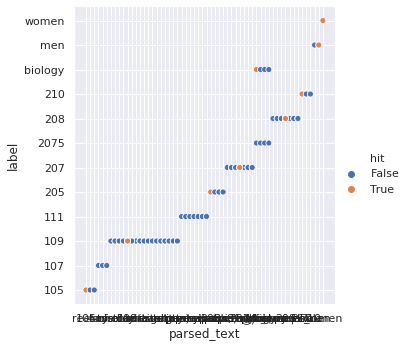

In [30]:
sns.relplot(y='label', x='parsed_text', hue='hit', data=pl22)

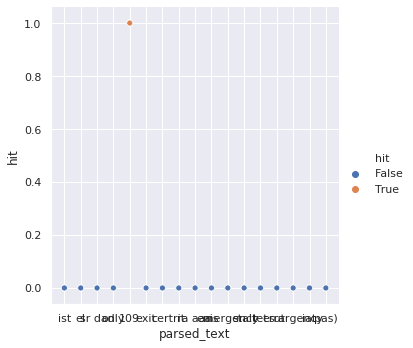

In [32]:
sns.relplot(y='hit', x='parsed_text', hue='hit', data=pl22.query("label == '109'"))

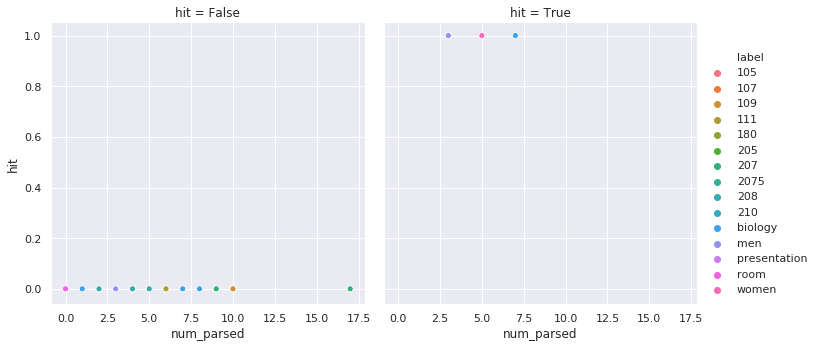

In [44]:
sns.relplot(y='hit', x='num_parsed',col='hit', hue='label', data=pl22)

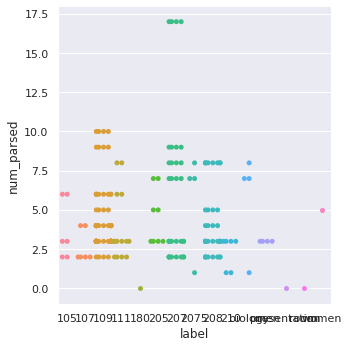

In [57]:
sns.catplot(x='label', y='num_parsed',kind='swarm', data=pl22)
sns.catplot(x='label', y='num_parsed',kind='swarm',hue='hit', data=pl22)

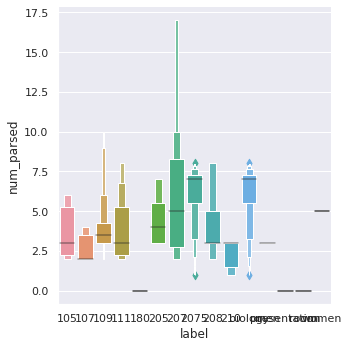

In [60]:
sns.catplot(x='label', y='num_parsed',kind='boxen', data=pl22)